# Importing Modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from prettytable import PrettyTable
# random.seed(0)

# 1. Perceptron Learning Algorithm

In [ ]:
n_samples = 1000
gammas = [0.025, 0.05, 0.1, 0.25, 0.5, 1, 2.5, 5]

In [ ]:
def gen_params():
  params = np.array([random.uniform(-5, 5) for i in range(3)]) # a*x + b*y + c
  return params

In [ ]:
def gen_dataset(params, gamma):
  X = []
  Y = []
  i = 1
  while i <= n_samples:
    new_data = np.array([random.uniform(-5, 5), random.uniform(-5, 5), 1])
    val = params.T @ new_data # substituing a*x + b*y + c*1
    if abs(val) / np.sqrt(params[0] ** 2 + params[1] ** 2) >= gamma:
      i += 1
      if val > 0:
        X.append(new_data)
        Y.append(1)
      else:
        X.append(new_data)
        Y.append(-1)

  X = np.array(X)
  Y = np.array(Y)
  return X, Y

In [ ]:
def train_perceptron(X, Y, w):
  k = 1
  while True:
    flag = 0
    for i in range(X.shape[0]):
      if (w.T @ X[i]) * Y[i] <= 0:
        w = w + Y[i] * X[i]
        flag = 1
        k += 1
    if flag == 0:
      return w, k

In [ ]:
def show_dataset(X, Y):
  plt.scatter([i[0] for i in X], [i[1] for i in X], c=Y, s=9)
  plt.title("Dataset generated")
  plt.show()

In [ ]:
def show_plot(X, Y, w, title):
  x = np.linspace(-6,6,500)
  if w[0]:
    y = []
    for val_x in x:
      val_y = -(w[2] + w[0] * val_x) / w[1]
      y.append(val_y)
  else:
    y = [0] * 500
  plt.plot(x, y, '-r', label='W')
  plt.title(title)
  plt.xlabel('x', color='#1C2833')
  plt.ylabel('y', color='#1C2833')
  plt.xlim([-6, 6])
  plt.ylim([-6, 6])
  plt.legend(loc='upper left')
  plt.scatter([i[0] for i in X], [i[1] for i in X], s=9, c=Y)
  plt.grid()
  plt.show()

In [ ]:
results = {}
for gamma in gammas:
  results[gamma] = []
  for i in range(5):
    params = gen_params()
    # print(params)
    X, Y = gen_dataset(params, gamma)
    # show_dataset(X, Y)
    w = np.array([0] * len(X[0]))
    # show_plot(X, Y, w, "Graph of W before training")
    w, k = train_perceptron(X, Y, w)
    results[gamma].append(k)
    # show_plot(X, Y, w, "Graph of W after training")

+-----------------------+----------------------------------------------------------+
| Level of Separability | Number of iterations required for perfect classification |
+-----------------------+----------------------------------------------------------+
|         0.025         |                          287.0                           |
|          0.05         |                          112.4                           |
|          0.1          |                           28.4                           |
|          0.25         |                           20.8                           |
|          0.5          |                           17.4                           |
|           1           |                           7.4                            |
|          2.5          |                           3.4                            |
|           5           |                           2.0                            |
+-----------------------+----------------------------------------

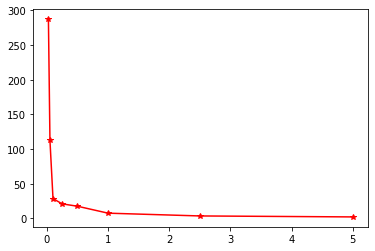

In [ ]:
average_iterations = []
t = PrettyTable(['Level of Separability', 'Number of iterations required for perfect classification'])
for gamma in gammas:
  avg = float(sum(results[gamma])) / len(results[gamma])
  average_iterations.append(avg)
  t.add_row([gamma, avg])

print(t)
plt.plot(gammas, average_iterations, 'r-*')
plt.show()

## Analysis
The number of iterations required for perfect analysis ($k$) is evidently inversely proportional to the level of separability ($\gamma$), i.e., $k$ decreases as $\gamma$ increases. We know that $\gamma$ is the minimum distance of a data point from the selected classifying hyperplane. As $\gamma$ increases, the gap between both the classes increases proportionally making it easier for the perceptron algorithm to find the separating hyperplane quicker.  

The parameters are: [ 4.79635651 -1.8184788  -0.92973471]


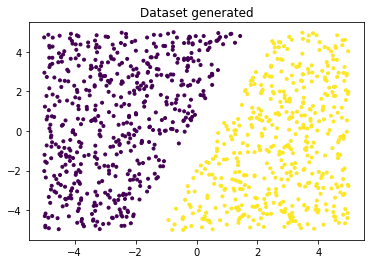

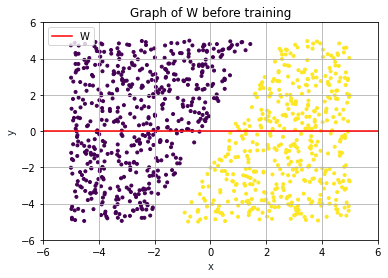

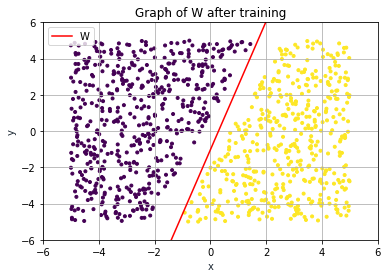

In [ ]:
# a sample example to display how the perceptron works
params = gen_params()
print("The parameters are: {}".format(params))
X, Y = gen_dataset(params, 0.5)
show_dataset(X, Y)
w = np.array([0] * len(X[0]))
show_plot(X, Y, w, "Graph of W before training")
w, k = train_perceptron(X, Y, w)
results[gamma].append(k)
show_plot(X, Y, w, "Graph of W after training")

# 2. Gradient descent for training a linear classifier

Loss function being used for training the linear classifier using gradient descent is Logistic Loss. Note that the sigmoid function is also being used after calculating the product of input and weight parameters. The reason behind choosing this particular loss function is that logistic loss is a convex function and differentiable.

In [ ]:
def sigmoid(x):
  sigmoid_op = 1 / (1 + np.exp(-x))
  return sigmoid_op

def logistic_loss(calculated_y, expected_y):
  ind_loss = - (expected_y * np.log(calculated_y) + (1 - expected_y) * np.log(1 - calculated_y)) # logistic loss
  cost = np.sum(ind_loss) / expected_y.size
  return cost

def calculate_gradient(calculated_y, expected_y, X):
  diff_y = calculated_y - expected_y
  # gradient = (X.T @ diff_y) / expected_y.size
  gradient_1 = np.sum(diff_y * X[:, 0]) / expected_y.size
  gradient_2 = np.sum(diff_y * X[:, 1]) / expected_y.size
  gradient_3 = np.sum(diff_y * X[:, 2]) / expected_y.size
  gradient = np.array([gradient_1, gradient_2, gradient_3])
  return gradient

def update_params(w, gradient, learning_rate):
  w = w - (learning_rate * gradient)
  return w

def train_linear_classifier(X, Y, w, no_of_epochs, learning_rate):
  for epoch in range(no_of_epochs):
    calculated_y = sigmoid(np.dot(X, w))
    gradient = calculate_gradient(calculated_y, Y, X)
    w = update_params(w, gradient, learning_rate)
    w = w / np.linalg.norm(w)
  return w

In [ ]:
no_of_iterations = 400
learning_rate = 0.05

The parameters are: [ 0.826257    2.38408931 -1.65496336]


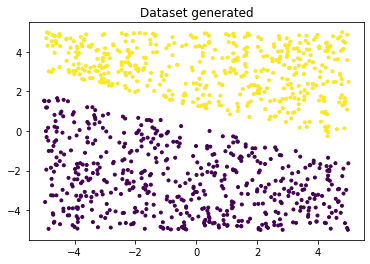

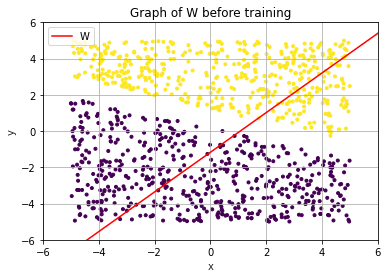

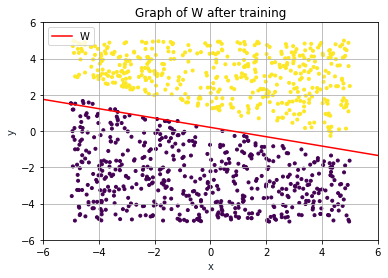

In [ ]:
params = gen_params()
print("The parameters are: {}".format(params))
X, Y = gen_dataset(params, 0.5)
Y[Y == -1] = 0
show_dataset(X, Y)
w = np.array([random.uniform(-5, 5) for i in range(3)])
# print(w)
show_plot(X, Y, w, "Graph of W before training")
w = train_linear_classifier(X, Y, w, no_of_iterations, learning_rate)
# print(w)
show_plot(X, Y, w, "Graph of W after training")

# 3. MLP with a single hidden layer

In [ ]:
def gen_dataset_circular(no_of_samples_per_class):
  t = np.linspace(0, 2 * np.pi, no_of_samples_per_class, endpoint=False)
  r = np.random.uniform([[2], [7]], [[4], [9]], size=(2, no_of_samples_per_class))
  X_1 = r[0] * np.cos(t), r[0] * np.sin(t)
  X_2 = r[1] * np.cos(t), r[1] * np.sin(t)
  X = []
  Y = []
  for i in range(no_of_samples_per_class):
    X.append([X_1[0][i] + random.uniform(-1, 1), X_1[1][i] + random.uniform(-1, 1)])
    Y.append(1)
  for i in range(no_of_samples_per_class):
    X.append([X_2[0][i] + random.uniform(-1, 1), X_2[1][i] + random.uniform(-1, 1)])
    Y.append(0)

  X = np.array(X)
  Y = np.array(Y)
  return X, Y

def shuffle_dataset(X, Y):
  assert len(X) == len(Y)
  p = np.random.permutation(len(X))
  return X[p], Y[p]


Number of nodes in the input layer = 2 \
Number of nodes in the hidden layer = 5 (modifiable) \
Number of nodes in the output layer = 1 (classification problem) \
The activation function being used is sigmoid.

In [ ]:
def define_nn(X, Y, hidden_layer_size=10):
  input_size = X.shape[1]
  hidden_size = hidden_layer_size
  output_size = 1
  return input_size, hidden_size, output_size

def init_params(input_size, hidden_size, output_size):
  w12 = np.random.uniform(size=(hidden_size, input_size))
  b1 = np.random.uniform(size=(hidden_size, 1))
  w23 = np.random.uniform(size=(output_size, hidden_size))
  b2 = np.random.uniform(size=(output_size, 1))
  params = {"w12": w12,
            "w23": w23,
            "b1": b1,
            "b2": b2}
  return params

In [ ]:
def forward_pass(X, params):
  s1 = X @ params["w12"].T + params["b1"].T
  x1 = sigmoid(s1)
  s2 = x1 @ params["w23"].T + params["b2"].T
  x2 = sigmoid(s2)
  outputs = {"s1": s1,
             "x1": x1,
             "s2": s2,
             "x2": x2}
  return outputs

def predict(Y):
  return np.where(Y >= 0.5, 1, 0)

def loss_function(calculated_y, expected_y):
  ind_loss = - (expected_y * np.log(calculated_y) + (1 - expected_y) * np.log(1 - calculated_y)) # logistic loss
  cost = np.sum(ind_loss) / expected_y.size
  return cost

The loss function being used for training MLP with a single hidden layer is Logistic Loss again.

In [ ]:
def back_propagation(x, y, params, outputs):
  dx2 = -((y) / outputs["x2"] + (y - 1) / (1 - outputs["x2"]))
  ds2 = dx2 * (outputs["x2"] * (1 - outputs["x2"]))
  dw23 = ds2.T @ outputs["x1"]
  db2 = ds2

  dx1 = ds2 * params["w23"].T
  ds1 = dx1 * (outputs["x1"].T * (1 - outputs["x1"].T))
  dw12 = ds1 @ x.reshape((2, 1)).T
  db1 = ds1

  gradients = {"dw12": dw12,
               "db1": db1,
               "dw23": dw23,
               "db2": db2}
  return gradients

def update_params(params, gradients, learning_rate):
  params["w12"] = params["w12"] - (learning_rate * gradients["dw12"])
  params["w23"] = params["w23"] - (learning_rate * gradients["dw23"])
  params["b1"] = params["b1"] - (learning_rate * gradients["db1"])
  params["b2"] = params["b2"] - (learning_rate * gradients["db2"])
  return params

In [ ]:
def train_MLP(X, Y, no_of_epochs, learning_rate, hidden_layer_units):
  input_size, hidden_size, output_size = define_nn(X, Y, hidden_layer_units)
  params = init_params(input_size, hidden_size, output_size)
  for epoch in range(no_of_epochs):
    for index in range(Y.shape[0]):
      outputs = forward_pass(X[index], params)
      gradients = back_propagation(X[index], Y[index], params, outputs)
      params = update_params(params, gradients, learning_rate)
  return params


In [ ]:
no_of_samples = 500
no_of_epochs = 100
learning_rate = 0.01
hidden_layer_units = 5

In [ ]:
X, Y = gen_dataset_circular(no_of_samples)
X, Y = shuffle_dataset(X, Y)
Y = Y.reshape((2 * no_of_samples, 1))

In [ ]:
final_params = train_MLP(X, Y, no_of_epochs, learning_rate, hidden_layer_units)

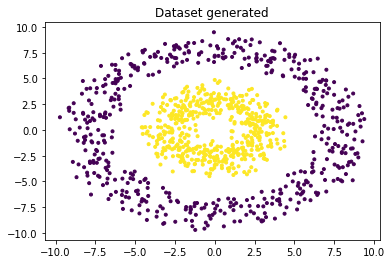

Accuracy of the model = 0.992


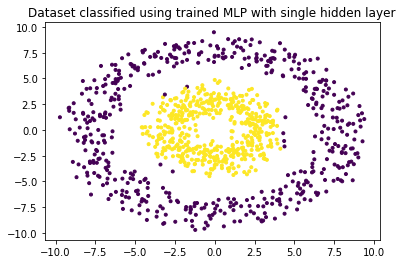

In [ ]:
no_of_correct = 0
predicted_y = []
for index in range(Y.shape[0]):
  outputs = forward_pass(X[index], final_params)
  calculated_y = predict(outputs["x2"])
  predicted_y.append(int(calculated_y))
  if calculated_y == Y[index]:
    no_of_correct += 1

show_dataset(X, Y)
print("Accuracy of the model = {}".format(no_of_correct / (2 * no_of_samples)))

plt.scatter([i[0] for i in X], [i[1] for i in X], c=predicted_y, s=9)
plt.title("Dataset classified using trained MLP with single hidden layer")
plt.show()